# Loan Prediction System

## About the Dataset 

The loan approval dataset considered here is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status.

This dataset is commonly used to predict the likelihood of loan approval based on the given features

## 1. Importing the libraries and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  #importing the libraries

In [2]:
df=pd.read_csv(r"D:\Meta scifor\Major Project\loan_approval_dataset.csv") #importing the dataset into pandas dataframe

In [3]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.info() #basic info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


## 2. Data Cleaning

In [5]:
df.columns #various columns in the dataset

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

As the column names are with space, strip the names by removing unwanted spaces

In [6]:
df.columns=[i.strip() for i in df.columns]
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

### Checking for missing values 

In [7]:
df.isna().sum() #shows the number of missing values

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

There are no missing values in the dataset

### Checking for duplicate values in the dataset

In [8]:
df.duplicated().sum() #shows the duplicated rows

0

There are no duplicated values in the dataset

In [9]:
df.describe() #descriptive statistics 

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


## 3. Understanding the data

### Inspecting the various columns

In [10]:
df['education'].value_counts()

 Graduate        2144
 Not Graduate    2125
Name: education, dtype: int64

In column education, Graduate are 2144 and Not graduate who have applied for loan are 2125

In [11]:
df['self_employed'].value_counts()

 Yes    2150
 No     2119
Name: self_employed, dtype: int64

Out of the total 4269 records, 2150 are self-employed rest are not self-employed

### Data Visualisation

In [12]:
sns.set_theme()

Text(0.5, 0.98, 'Plots showing No of Dependents')

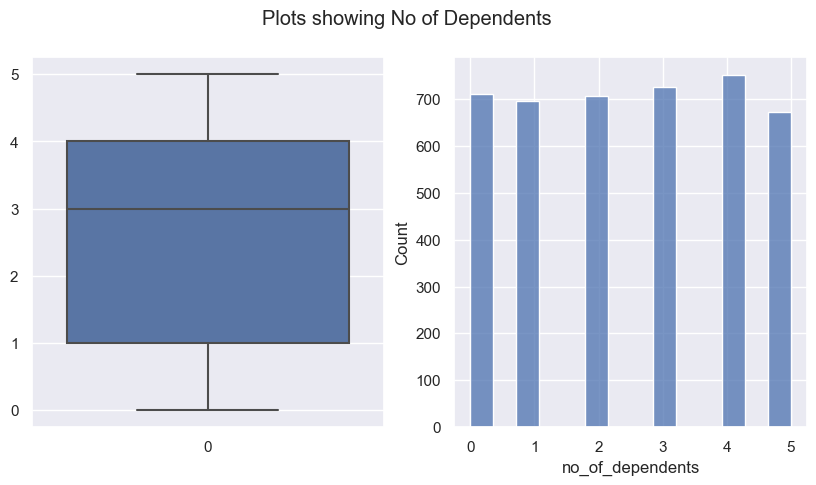

In [13]:
fig1,ax1=plt.subplots(1,2)
fig1.set_figwidth(10)
sns.boxplot(df['no_of_dependents'],ax=ax1[0])
sns.histplot(df['no_of_dependents'],ax=ax1[1])
plt.suptitle('Plots showing No of Dependents')

Checking for outliers to treat, there are no outliers in the number of dependents column. They are more or less uniformly distributed.

Text(0.5, 0.98, 'Plots showing Annual Income')

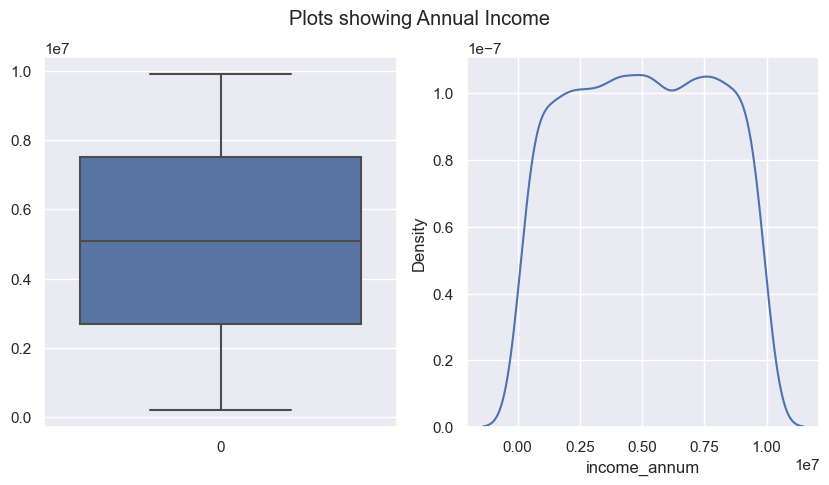

In [14]:
fig1,ax1=plt.subplots(1,2)
fig1.set_figwidth(10)
sns.boxplot(df['income_annum'],ax=ax1[0])
sns.kdeplot(df['income_annum'],ax=ax1[1])
plt.suptitle('Plots showing Annual Income')

In anuual income, there are no outliers

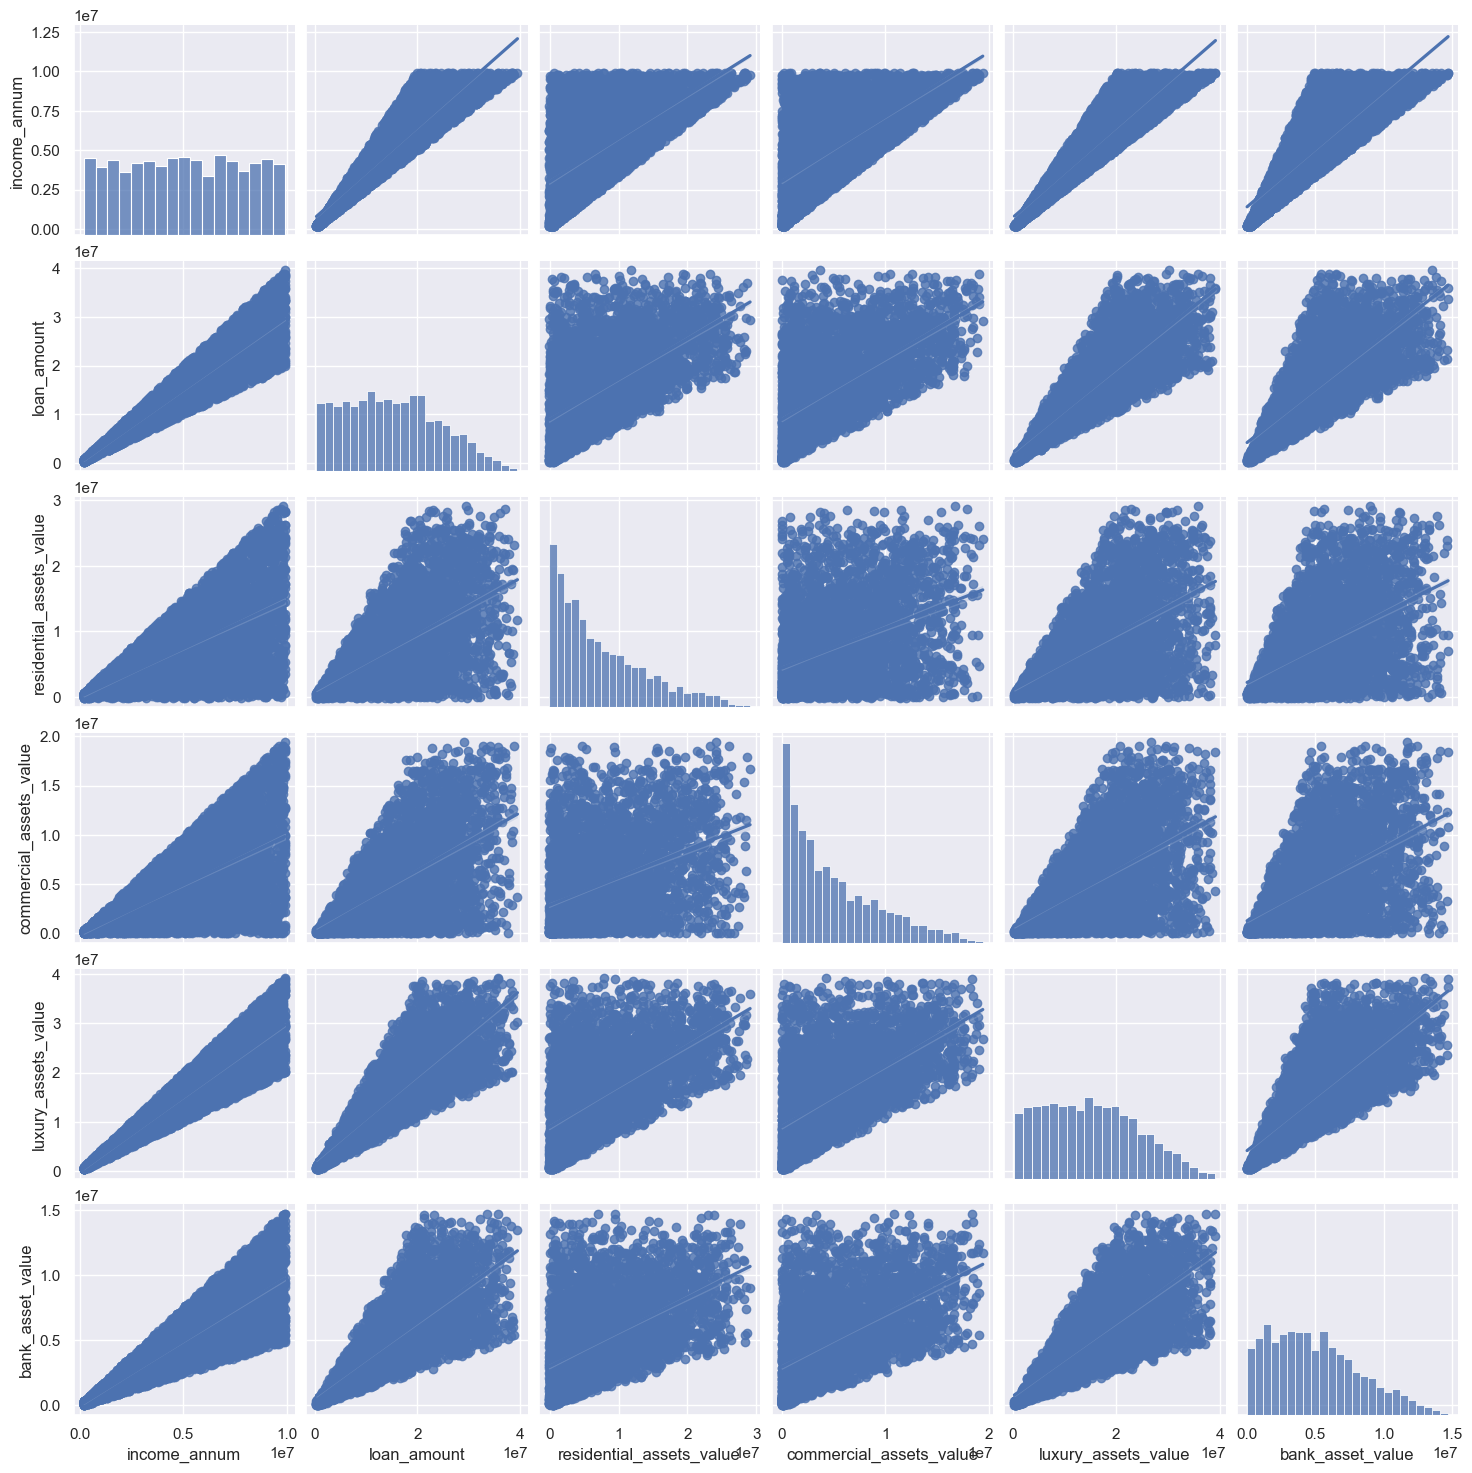

In [15]:
sns.pairplot(df,vars=['income_annum','loan_amount','residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value'],kind='reg')

The above pairplot shows the distribution of various data and how they related to each other

Text(0.5, 0.98, 'Cibil Score vs Education and Self-employed')

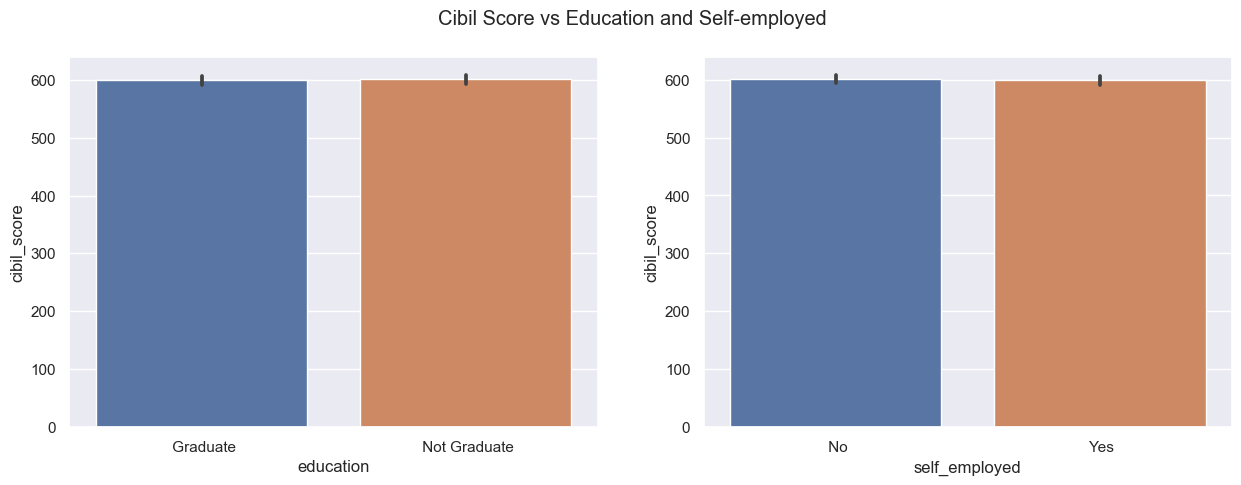

In [16]:
fig4,ax4=plt.subplots(1,2)
fig4.set_figwidth(15)
sns.barplot(x=df['education'],y=df['cibil_score'],ax=ax4[0])
sns.barplot(x=df['self_employed'], y=df['cibil_score'],ax=ax4[1])
plt.suptitle('Cibil Score vs Education and Self-employed')

There is no considerable difference in cibil score based on education and employment

Text(0.5, 0.98, 'Loan Status vs Annual Income, Loan Amount, Loan Term and Cibil Score')

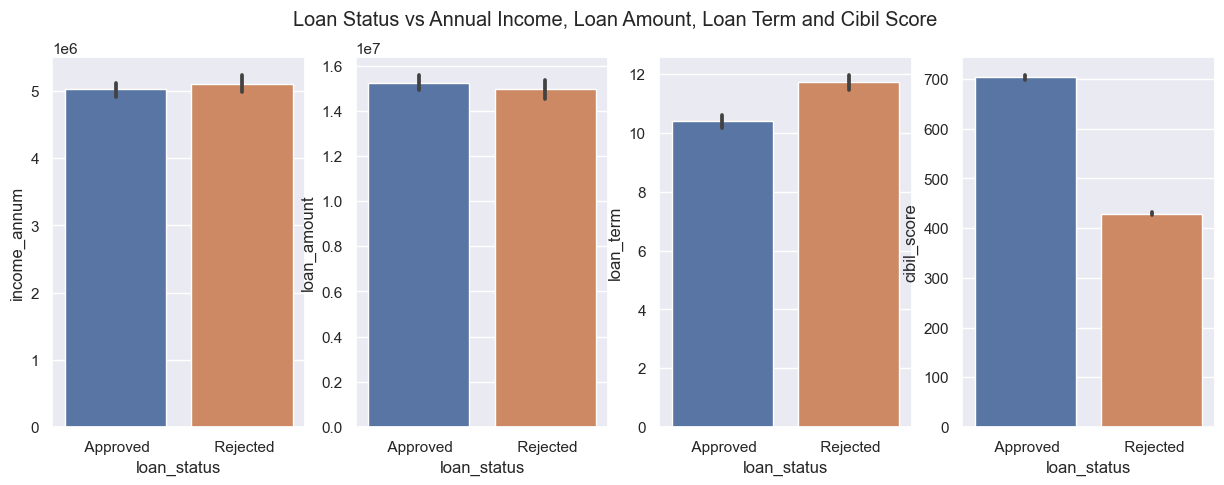

In [17]:
fig5,ax5=plt.subplots(1,4)
fig5.set_figwidth(15)
sns.barplot(x=df['loan_status'],y=df['income_annum'],ax=ax5[0])
sns.barplot(x=df['loan_status'],y=df['loan_amount'],ax=ax5[1])
sns.barplot(x=df['loan_status'], y=df['loan_term'],ax=ax5[2])
sns.barplot(x=df['loan_status'],y=df['cibil_score'],ax=ax5[3])
plt.suptitle('Loan Status vs Annual Income, Loan Amount, Loan Term and Cibil Score')

From the above bar plot it is clear that loan has higher chances of approval when the cibil score is high(approx > 400)

Text(0.5, 0.98, 'Loan status vs Asset values')

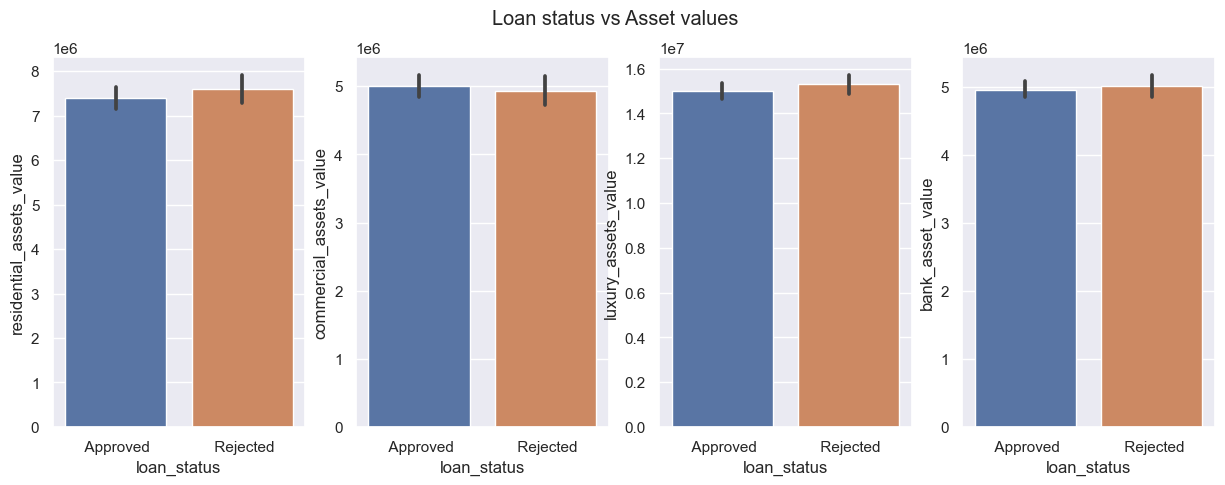

In [19]:
fig6,ax6=plt.subplots(1,4)
fig6.set_figwidth(15)
sns.barplot(x=df['loan_status'],y=df['residential_assets_value'],ax=ax6[0])
sns.barplot(x=df['loan_status'],y=df['commercial_assets_value'],ax=ax6[1])
sns.barplot(x=df['loan_status'], y=df['luxury_assets_value'],ax=ax6[2])
sns.barplot(x=df['loan_status'],y=df['bank_asset_value'],ax=ax6[3])
plt.suptitle('Loan status vs Asset values')

All the asset value has more or less same contribution to loan status approval

In [14]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## 4. Data Preparation for modelling

As the Machine learning model accepts only numbers, let us convert all the categorical columns to numbers

In [20]:
df['loan_status'].value_counts()

 Approved    2656
 Rejected    1613
Name: loan_status, dtype: int64

Out of the total records, 2656 loans got approved and 1613 got rejected

In [21]:
df['loan_status'].values

array([' Approved', ' Rejected', ' Rejected', ..., ' Rejected',
       ' Approved', ' Approved'], dtype=object)

In [21]:
df['loan_status']=df['loan_status'].apply(lambda x: x.strip())

In [22]:
df['loan_status'].values

array(['Approved', 'Rejected', 'Rejected', ..., 'Rejected', 'Approved',
       'Approved'], dtype=object)

In [23]:
df['loan_status']=df['loan_status'].apply(lambda x: 1 if x=='Approved' else 0) #coverting the loan status to 1 and 0's

Approved is converted to 1 and Rejected to 0

In [24]:
df['loan_status'].value_counts()

1    2656
0    1613
Name: loan_status, dtype: int64

### Encoding of Education and Self-employed column

In [26]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Education_enc']=encoder.fit_transform(df['education'])

In [27]:
df.pivot_table(columns='education',values='Education_enc')

education,Graduate,Not Graduate
Education_enc,0,1


Label encoding is used to encode the education and self-employed column. 0 for graduate and 1 for not graduate

In [28]:
df['self_employed_enc']=encoder.fit_transform(df['self_employed'])

In [29]:
df.pivot_table(columns='self_employed',values='self_employed_enc')

self_employed,No,Yes
self_employed_enc,0,1


If self-employed , 1 else encoded as 0

A new pandas dataframe df_model is created with numerical columns needed for model building alone as shown below

In [30]:
df_model=df.drop(['education','loan_id','self_employed'],axis=1)
df_model.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Education_enc,self_employed_enc
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,0,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1,1


In [31]:
df_corr=df.drop('loan_id',axis=1) #to see the correlation between various variables

C:\Users\GAYATHRI NARESH\AppData\Local\Temp\ipykernel_17104\3287941631.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_corr.corr(),annot=True,fmt='0.1f')


<Axes: >

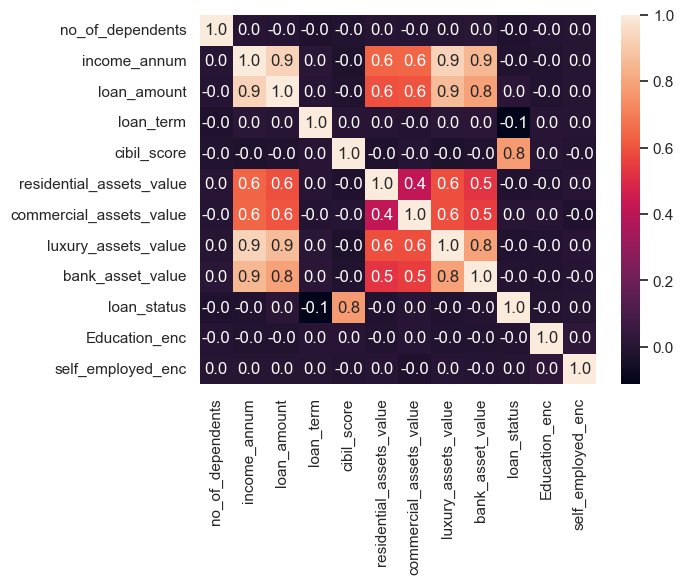

In [32]:
sns.heatmap(df_corr.corr(),annot=True,fmt='0.1f')

From the above heat map, it is clear that cibil score has high correlation with the loan status 

## 5. Model building

The given problem is a binary classification model. Here Logistic Regression and Decision Tree Classifier models are built

In [33]:
X=df_model.drop(['loan_status'],axis=1)
y=df_model['loan_status'] #declaring X and y variables

In [34]:
X[:5]

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,Education_enc,self_employed_enc
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1


###  5.1 Logistic Regression Model

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() #values are scaled to avoid bias in the model

In [36]:
X_std=scaler.fit_transform(X)
X_std

array([[-0.2941017 ,  1.61797904,  1.63305171, ...,  0.93030441,
        -0.99555917, -1.00728821],
       [-1.4735476 , -0.34174956, -0.32441406, ..., -0.51593638,
         1.00446064,  0.99276452],
       [ 0.29562125,  1.4398219 ,  1.61093345, ...,  2.40731629,
        -0.99555917, -1.00728821],
       ...,
       [-0.2941017 ,  0.51340474,  0.96950399, ...,  0.71490685,
         1.00446064, -1.00728821],
       [-0.88382465, -0.34174956, -0.25805929, ...,  0.25334064,
         1.00446064, -1.00728821],
       [-0.88382465,  1.47545332,  1.61093345, ...,  2.16114764,
        -0.99555917, -1.00728821]])

In [37]:
from sklearn.model_selection import train_test_split #to split the data into train and test data

In [38]:
from sklearn.linear_model import LogisticRegression
logistic_regression=LogisticRegression() #creating logistic regression model

In [39]:
X_trains,X_tests,y_train,y_test=train_test_split(X_std,y,test_size=0.2,random_state=6)
#splitting the data- 20% is kept for testing

In [44]:
print(X_trains.shape,X_tests.shape,y_train.shape,y_test.shape)

(3415, 11) (854, 11) (3415,) (854,)


In [40]:
logistic_regression.fit(X_trains,y_train) #fitting the model

LogisticRegression()

In [41]:
y_pred_LR=logistic_regression.predict(X_tests) #predicting the y value for test data

### Evaluation of logistic regression model

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_auc_score

In [43]:
cm_LR=confusion_matrix(y_test,y_pred_LR)
print(cm_LR)

[[299  34]
 [ 32 489]]


Out of the 854 test data, 299 are correctly identified as rejected loan, 489 as approved loan.
34 rejected loans were identified as approved and 32 approved loans were classified as rejected

In [71]:
print(accuracy_score(y_test,y_pred_LR))

0.9227166276346604


Accuracy of the model is 92%

In [45]:
print(classification_report(y_test,y_pred_LR))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       333
           1       0.93      0.94      0.94       521

    accuracy                           0.92       854
   macro avg       0.92      0.92      0.92       854
weighted avg       0.92      0.92      0.92       854



### 5.2 Decision Tree Classifier

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2) #splitting the data into train and test data

In [47]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(3415, 11) (3415,) (854, 11) (854,)


In [48]:
y.value_counts()

1    2656
0    1613
Name: loan_status, dtype: int64

In [49]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()

In [77]:
DecisionTreeClassifier?

In [54]:
DTC.fit(X_train,y_train) #fitting the model

DecisionTreeClassifier()

In [55]:
y_pred_DTC=DTC.predict(X_test) #predicting the value of y for test data

### Evaluation of Decision Tree Model

In [56]:
cm_DTC=confusion_matrix(y_test,y_pred_DTC)
print(cm_DTC)

[[313  11]
 [  8 522]]


Out of the 854 test data, 313 are correctly identified as rejected loan, 522 as approved loan.
11 rejected loans were identified as approved and 8 approved loans were classified as rejected

In [57]:
print(accuracy_score(y_test,y_pred_DTC))

0.977751756440281


Accuracy of Decision Tree model is 98%. Accuracy is increased compared to Logistic Regression model

In [58]:
print(classification_report(y_test,y_pred_DTC))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       324
           1       0.98      0.98      0.98       530

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



## 6. Saving the model

In [83]:
import pickle
filename='D:\Meta scifor\Major Project - Loan Prediction\model.pkl'
pickle.dump(DTC,open(filename,'wb'))

The Decision Tree Classifier model built is saved for deployment